In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Read data file
df = pd.read_csv('/content/drive/MyDrive/PTDLKD/Data/Platinum_Data.csv', index_col='Date')

# PREPROCESSING DATA

In [38]:
# Flip the dataset
df = df.iloc[::-1]

# Reset the index
df = df.reset_index(drop=True)

# Drop unused columns
df.drop(['Vol.', 'Change %'], axis=1, inplace = True)

# Drop missing values
df = df.dropna()

In [39]:
df

,Price,Open,High,Low
0,886.20,886.80,889.00,885.50
1,899.50,886.20,902.70,877.80
2,908.30,899.50,912.00,896.30
3,904.60,908.30,910.40,898.50
4,910.40,904.60,914.70,903.50
...,...,...,...,...
1553,"1,082.80","1,057.60","1,079.10","1,057.50"
1554,"1,075.00","1,070.50","1,078.70","1,061.80"
1555,"1,090.70","1,067.70","1,086.10","1,067.40"
1556,"1,066.30","1,079.20","1,080.80","1,055.00"


In [40]:
# Format column Price to float
# List of column names to convert
columns = ['Price', 'Open', 'High', 'Low']

# Iterate over the columns and convert them to float
for column in columns:
    df[column] = df[column].str.replace(',', '').astype(float)
df

,Price,Open,High,Low
0,886.2,886.8,889.0,885.5
1,899.5,886.2,902.7,877.8
2,908.3,899.5,912.0,896.3
3,904.6,908.3,910.4,898.5
4,910.4,904.6,914.7,903.5
...,...,...,...,...
1553,1082.8,1057.6,1079.1,1057.5
1554,1075.0,1070.5,1078.7,1061.8
1555,1090.7,1067.7,1086.1,1067.4
1556,1066.3,1079.2,1080.8,1055.0


# SPLITTING DATA(7-2-1)

In [41]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

# FIND BEST VALUE FOR K

In [42]:
# Import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 9.256405186544722
RMSE value for k=  2 is: 8.223888205626926
RMSE value for k=  3 is: 7.72930941343239
RMSE value for k=  4 is: 7.606594992466818
RMSE value for k=  5 is: 7.455440621137394
RMSE value for k=  6 is: 7.339288770394184
RMSE value for k=  7 is: 7.415995525340192
RMSE value for k=  8 is: 7.5703483380890795
RMSE value for k=  9 is: 7.5945064764824
RMSE value for k=  10 is: 7.731244939328804
RMSE value for k=  11 is: 7.902774485561191
RMSE value for k=  12 is: 8.092996866604421
RMSE value for k=  13 is: 8.1461077819583
RMSE value for k=  14 is: 8.24159543223995
RMSE value for k=  15 is: 8.344326277713442
RMSE value for k=  16 is: 8.445723365538482
RMSE value for k=  17 is: 8.582420238095455
RMSE value for k=  18 is: 8.71717740158253
RMSE value for k=  19 is: 8.7792554884885
RMSE value for k=  20 is: 8.949917906133415


<Axes: >

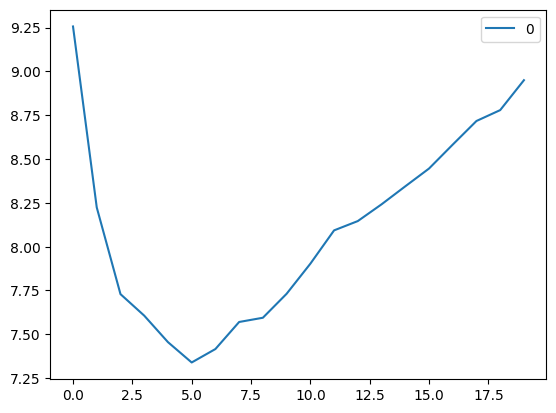

In [44]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

# K-NEAREST NEIGHBOR

In [45]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 8)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [46]:
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [47]:
#  Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[648.7 648.7 648.7 648.7 648.7 648.7 648.7 648.7 648.7 648.7 648.7 648.7
 648.7 648.7 648.7 648.7 648.7 648.7 648.7 648.7 648.7 648.7 648.7 648.7
 648.7 648.7 648.7 648.7 648.7 648.7]


In [48]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  7.5703483380890795
Testing MAE:  5.875984726688104
Testing MAPE:  0.6133215675352983
Validation RMSE:  8.581396114588678
Validation MAE:  6.936783439490445
Validation MAPE:  0.6763440657976781


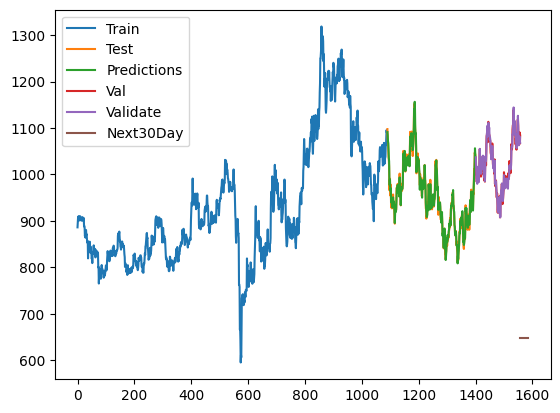

In [49]:
# Plot the model
plt.plot(train_data.index,train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [50]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.99


# SPLITTING DATA(6-3-1)

In [51]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# FIND BEST VALUE FOR K

In [52]:
x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

In [53]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 9.120273848681656
RMSE value for k=  2 is: 8.68382601822349
RMSE value for k=  3 is: 8.307821906485689
RMSE value for k=  4 is: 8.299436914931345
RMSE value for k=  5 is: 8.37198169587464
RMSE value for k=  6 is: 8.380584783565956
RMSE value for k=  7 is: 8.445186479359304
RMSE value for k=  8 is: 8.69225944334731
RMSE value for k=  9 is: 8.91615328174604
RMSE value for k=  10 is: 8.859927143807449
RMSE value for k=  11 is: 9.012676126378684
RMSE value for k=  12 is: 9.097114641213679
RMSE value for k=  13 is: 9.227887229912138
RMSE value for k=  14 is: 9.42298626401192
RMSE value for k=  15 is: 9.493967853366769
RMSE value for k=  16 is: 9.689948186542047
RMSE value for k=  17 is: 9.77541387207789
RMSE value for k=  18 is: 9.876886125718364
RMSE value for k=  19 is: 10.006158263677206
RMSE value for k=  20 is: 10.103411541943016


<Axes: >

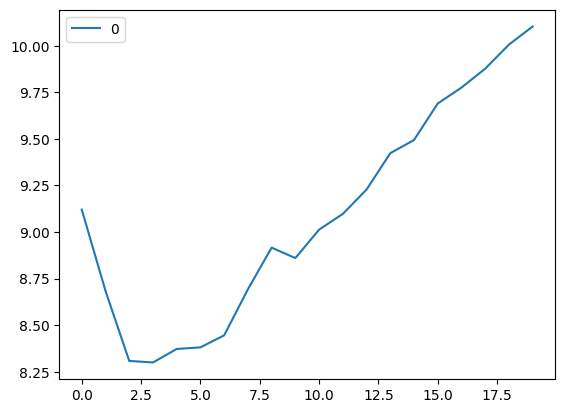

In [54]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

# K-NEAREST NEIGHBOR

In [55]:
# create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 6)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [56]:
import numpy as np
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [57]:
#  Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[631.475 631.475 631.475 631.475 631.475 631.475 631.475 631.475 631.475
 631.475 631.475 631.475 631.475 631.475 631.475 631.475 631.475 631.475
 631.475 631.475 631.475 631.475 631.475 631.475 631.475 631.475 631.475
 631.475 631.475 631.475]


In [58]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  8.380584783565956
Testing MAE:  6.516862955032125
Testing MAPE:  0.6563515883449265
Validation RMSE:  9.811311503657278
Validation MAE:  7.69187898089172
Validation MAPE:  0.7500022762106551


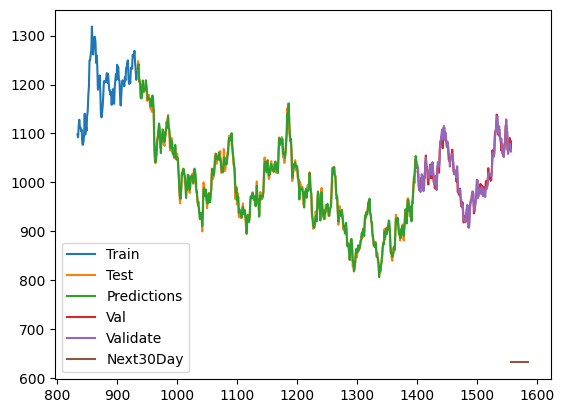

In [59]:
# Plot the model
plt.plot(train_data.index[train_size-100:],train_data['Price'][train_size-100:])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [60]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.99


# SPLITTING DATA(5-3-2)

In [61]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# FIND BEST VALUE FOR K

In [62]:
x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

In [63]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 93.86292835900913
RMSE value for k=  2 is: 95.08256395442721
RMSE value for k=  3 is: 97.26810887828799
RMSE value for k=  4 is: 96.83254373935577
RMSE value for k=  5 is: 99.68745551333805
RMSE value for k=  6 is: 100.93632649352558
RMSE value for k=  7 is: 103.7750743931821
RMSE value for k=  8 is: 104.2023686269136
RMSE value for k=  9 is: 103.93718402809193
RMSE value for k=  10 is: 104.59623996403779
RMSE value for k=  11 is: 104.0762519962272
RMSE value for k=  12 is: 104.17445040582965
RMSE value for k=  13 is: 103.35569095264707
RMSE value for k=  14 is: 103.6375317692469
RMSE value for k=  15 is: 104.59024898537055
RMSE value for k=  16 is: 105.6340630136617
RMSE value for k=  17 is: 106.60949596919696
RMSE value for k=  18 is: 107.37129932199858
RMSE value for k=  19 is: 108.11853127897254
RMSE value for k=  20 is: 108.77022439966227


<Axes: >

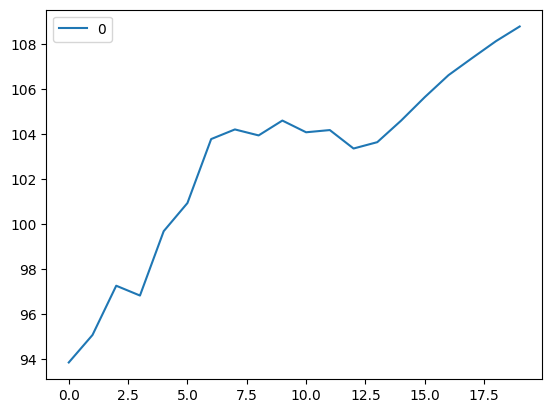

In [64]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

# K-NEAREST NEIGHBOR

In [65]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 6)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [66]:
import numpy as np
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [67]:
# Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[631.475 631.475 631.475 631.475 631.475 631.475 631.475 631.475 631.475
 631.475 631.475 631.475 631.475 631.475 631.475 631.475 631.475 631.475
 631.475 631.475 631.475 631.475 631.475 631.475 631.475 631.475 631.475
 631.475 631.475 631.475]


In [68]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  100.93632649352558
Testing MAE:  65.9374375446109
Testing MAPE:  5.65935289591095
Validation RMSE:  28.887291470977313
Validation MAE:  16.38108974358972
Validation MAPE:  1.5738099149186953


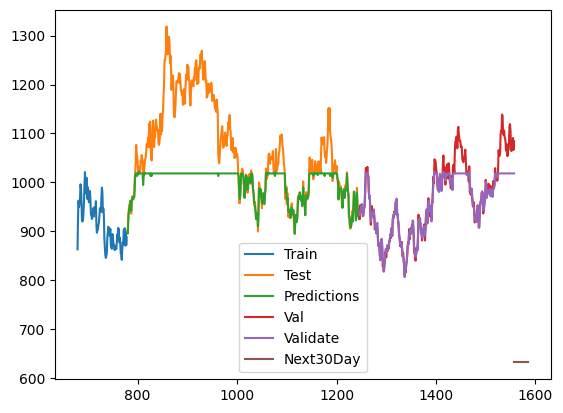

In [69]:
# Plot the model
plt.plot(train_data.index[train_size-100:],train_data['Price'][train_size-100:])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [70]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: -0.08


# EVALUATING MODEL

---
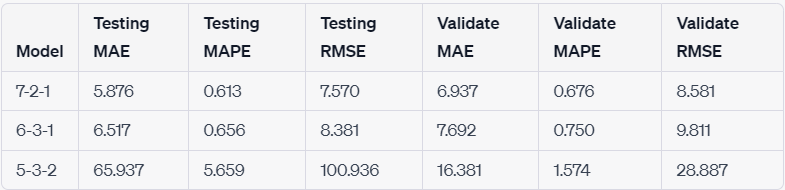